<a href="https://colab.research.google.com/github/mikgroup/bpt_mrpub/blob/main/bpt_bcg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wireless In-Bore Ballistocardiography with 2.4GHz Beat Pilot Tone (BPT)**
**Authors:** Suma Anand<sup>1</sup>, Michael Lustig<sup>1</sup>

<sup>1</sup> University of California, Berkeley

Author of this demo: [Suma Anand](https://people.eecs.berkeley.edu/~sanand/), sanand@berkeley.edu

 <font color='cinnamon'> **Note: If you just want to try out the code, skip to the "Processing the data" section!** </font>

 Also, this notebook looks best if you select the "dark" theme: go to settings in the top right > Theme > select dark from the dropdown.






# Overview





In this abstract, we show that we can sense a *ballistocardiogram* (BCG) using a microwave Radio Frequency (RF) sensor called the <font color='slateblue'> **Beat Pilot Tone (BPT)** </font>. BCG senses the vibrations of the body due to blood pulsing through it: like the recoil from shooting a gun, your whole body recoils from the ballistic forces of blood through the aorta! BCGs can measure acceleration, velocity, or displacement. A sample measurement setup might look like this:

<center> <img src="https://drive.google.com/uc?export=view&id=171KzF2WLJZbwk47itjdtYkNDNQVUBM5D" width="350"class="center"></center>

What's cool about this abstract is that we sense BCG **without putting any additional hardware on the subject**. We place a transmit antenna inside the bore, far away from the subject, and sense the BCG using the MRI receiver coil array. Our setup looks like this, where "BPT Tx" is the BPT transmit antenna in light purple. Note that "PT Tx" is an additional transmit antenna for a method called the Pilot Tone, which we describe in the next section.

<center> <img src="https://drive.google.com/uc?export=view&id=17YGckw1FPrr23mj8gBksj9G1iAZmjDsd" width="500"class="center"></center>

Specifically, we hypothesize that we measure *displacement* BCG (dBCG).  To see if it really is BCG that we're measuring, we take another simultaneous BCG measurement using an accelerometer (see figure above). We integrate acceleration twice to get displacement (with some high-pass filtering first). Then, we compare the resulting dBCG signal to our BPT sensor, along with a few other sensor signals like electrocardiogram (ECG) and photoplethysmogram (PPG).

Let's dive into how it's done!

# <font color='cinnamon'> What is the BPT? </font>

## <font color='slateblue'> Background: the Pilot Tone (PT) </font>


To understand this abstract, we first need to understand what the Beat Pilot Tone (BPT) sensor is. The BPT builds off of another RF sensor called the Pilot Tone (PT), which was first proposed by Peter Speier from Siemens in 2015. The idea is similar to continuous wave radar. The idea of the PT is to transmit an RF tone (the Pilot Tone) continuously that's slightly offset from the Larmor frequency but still within the bandwidth of the receiver coils.  This tone then interacts with the person and is sensed by the coils, so it appears alongside the image. Whenever the person moves, the RF wave changes slightly and alters the signal level of the Pilot Tone. With just an additional transmitter in or near the bore, you can get motion signals "for free" with the MR images!

Let's look in more detail at how the PT works. MR images generally have a bit of extra space at the end. Since the image readout axis corresponds to frequency, it means that we have some **unused bandwidth**, like in the image below (note that the frequency or readout axis is the vertical axis here):

<center> <img src="https://drive.google.com/uc?export=view&id=1BusmcSPy3-AvkaNcIt8-Xfv0hoPGxKOr" width="400"class="center"></center>

The blank space with red boxes around it is the extra bandwidth that isn't covered by any anatomy. 

To implement the Pilot Tone, we transmit an RF tone that corresponds to the frequency of that empty space: usually, a few 10s of kHz away from the Larmor frequency. In our GE 3T MR750W system, the Larmor frequency is 127.7MHz, so we can pick a frequency of 127.8MHz such that it's still within the overall receiver bandwidth, but will appear at the edge of the image.

The resulting image with the PT on will look like this:

<center> <img src="https://drive.google.com/uc?export=view&id=1jk4zVtz8EwB6-SsnIJUyEQdb5KEgeRDf" width="400"class="center"></center>



The problem, though, is that the PT must be in the receiver bandwidth. For us, this means that it should be roughtly 127.7MHz +/- 125kHz. A 127.8MHz RF wave has a wavelength of 2.3m. That's longer than the subject! 

## <font color='slateblue'>  Sensing with a shorter wavelength </font>

What if we could use a shorter wavelength RF and get better sensitivity to motion that way? For instance, radars can operate at microwave frequences like 2.4GHz. However, if we built a radar, we'd also have to build our own receiver system (and synchronize it to the MRI, and place it inside, and deal with cabling, etc...). Instead, we play a neat trick: we make use of **intermodulation**. Intermodulation is a property of nonlinear elements, like amplifiers. It mixes frequencies: if you transmit two tones at frequency f<sub>1</sub> and f<sub>2</sub>, you receive an **intermodulation product** at frequency f<sub>2</sub> - f<sub>1</sub>. We'll make use of this!

Like the figure below shows, we transmit two tones at frequencies f<sub>1</sub> and f<sub>2</sub> such that f<sub>2</sub> - f<sub>1</sub> = 127.8MHz. That way, the intermodulation product is now within the receiver bandwidth and gets processed by the receiver chain.

<center> <img src="https://drive.google.com/uc?export=view&id=1uOzDY5wOPo1OZed9gO-4dnnae-1UMX7N" width="400"class="center"></center>


If we have a receiver coil array (as is standard now in MRI suites), we get one BPT per each coil. In that way, we can get spatial information from multiple coils! Note that the intermodulation happens inside the preamp. The coil elements sense the field, and the voltages of the two tones are then mixed to create the intermodulation product that is sensed.
<center> <img src="https://drive.google.com/uc?export=view&id=1FgRJyVCtYsVsTZorFajgS6puzzzQDJv4" width="500"class="center"></center>


The BPT appears exactly the same as the PT: a line in the image, but this time corresponding to the beat frequency f<sub>2</sub> - f<sub>1</sub>. But unlike the PT, we now have free choice of these frequencies, and instead of sensing the frequency directly, we sense its intermodulation product.

You can check out our [original abstract](https://index.mirasmart.com/ISMRM2021/PDFfiles/0568.html) from ISMRM 2021 for more details.

## <font color='slateblue'>  How does the BPT work? </font>

It turns out that using microwave RF (like 2.4GHz) causes some interesting effects in the bore. Conventional superconducting MRI scanners have a cylindrical bore. The bore and whatever's inside it (i.e., the human subject) act as a **waveguide**, in which RF can propagate! In fact, if the RF that is transmitted has a frequency greater than the cutoff frequency of the waveguide, you see interesting **standing wave patterns** start to emerge, like in the magnetic field simulation below:

<center> <img src="https://drive.google.com/uc?export=view&id=1_rZ4k9IbSjYr1_eLgJ5QWybJu2T3mm-D" width="500"class="center"></center>


This is a finite-element electromagnetic field simulation which simulates the field in the bore due to a transmit antenna at the top at 127.8MHz (left) and 2.4GHz (right). 127.8MHz is below the cutoff of the waveguide, so it simply falls off in strength as you move away from the transmitter. The behavior at 2.4GHz, however, is more complicated: there appear to be patterns of peaks and nulls that vary over space. This simulation just has air inside the bore, but if you were to add a body inside, you would also see patterns like this.


Every time you move inside the bore, you cause the standing wave patterns to change. <font color='cinnamon'> **We hypothesize that the BPT samples these standing wave patterns, and that's what makes it very sensitive to small motions.** </font>


In this abstract, we show an example of the kinds of small motions the BPT can pick up in a way that the PT cannot: namely, a ballistocardiogram. We show that the BPT can pick up small displacements of the body due to the pulsation of blood. It can even do this when the transmit antenna is placed far away from the subject!

# Processing the data

## Install and import packages

First, let's install sigpy, a signal processing library that we'll use for some of our code.

In [ ]:
!pip install sigpy
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now let's import the rest of the modules we'll need.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import sigpy as sp
from scipy.signal import find_peaks
from scipy.optimize import lsq_linear
import scipy.integrate as integ

# For data I/O
import gdown
import zipfile

# Enable matplotlib widgets
from google.colab import output
output.enable_custom_widget_manager()

# Custom modules from git repo
if os.path.exists("mrpub"):
  !git clone https://github.com/mikgroup/bpt_mrpub.git
sys.path.append("bpt_mrpub")
import cfl # For data I/O, use cfl format from BART
import processing as proc
import plotting as plot

We can also update the default matplotlib parameters for nicer plotting.

In [ ]:
plt.rcParams.update({'axes.spines.right':False,
                     'axes.spines.left':False,
                    'axes.spines.top':False,
                    'axes.titlesize':18,
                    'axes.labelsize':16,
                    'legend.fontsize':16,
                    'xtick.labelsize':14,
                    'ytick.labelsize':14,
                     'lines.linewidth':2
                    })

## tl;dr Extract all data and generate plots

If you just want to run some code and see all the plots at once, run the cells below, which extract the data and generate all the plots. Otherwise, you can go through each of the sections, which explain the processing steps.

In [ ]:
# Download the data
url = 'https://drive.google.com/uc?id=1g3J-GC6oaxYquc296kdYaX5fLFgYM8ti'
output = 'data.zip'
gdown.download(url, output, quiet=False)
# Extract data to directory
with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall()

Downloading...
From: https://drive.google.com/uc?id=1g3J-GC6oaxYquc296kdYaX5fLFgYM8ti
To: /content/data.zip
100%|██████████| 198M/198M [00:02<00:00, 91.8MB/s]


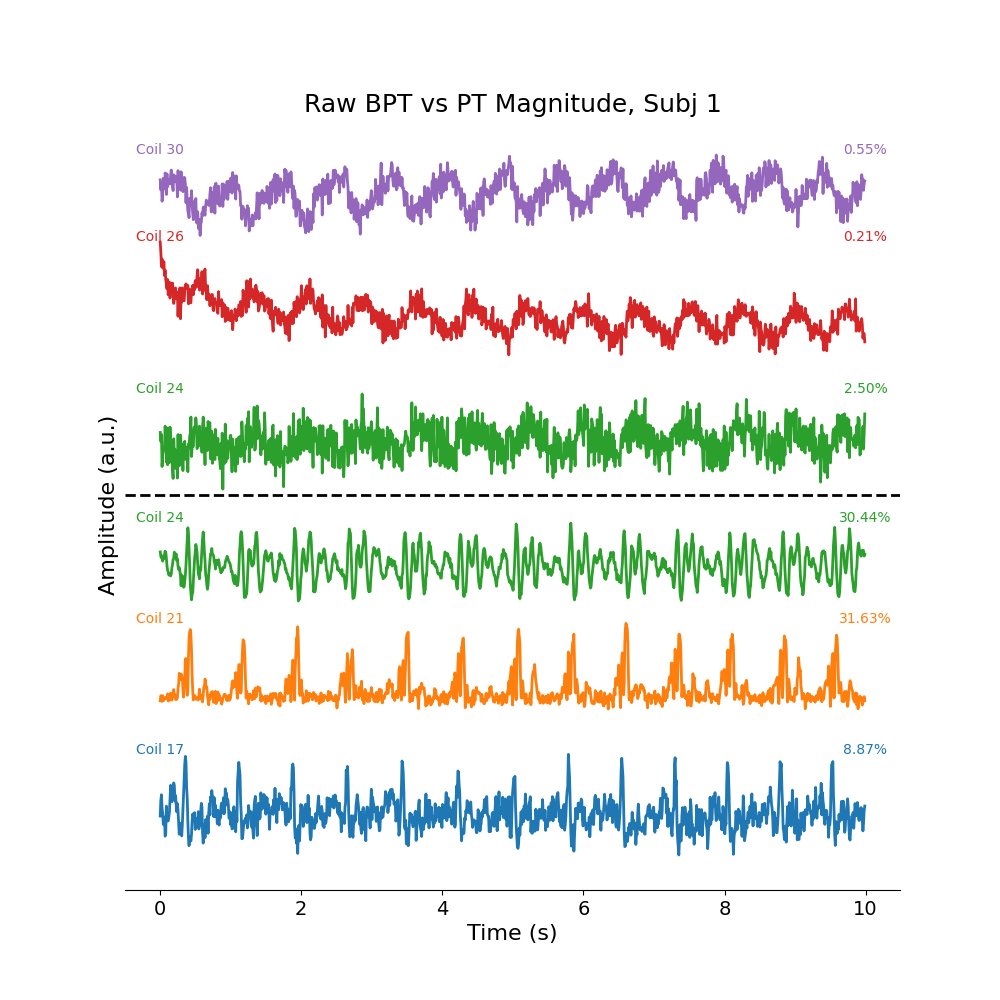

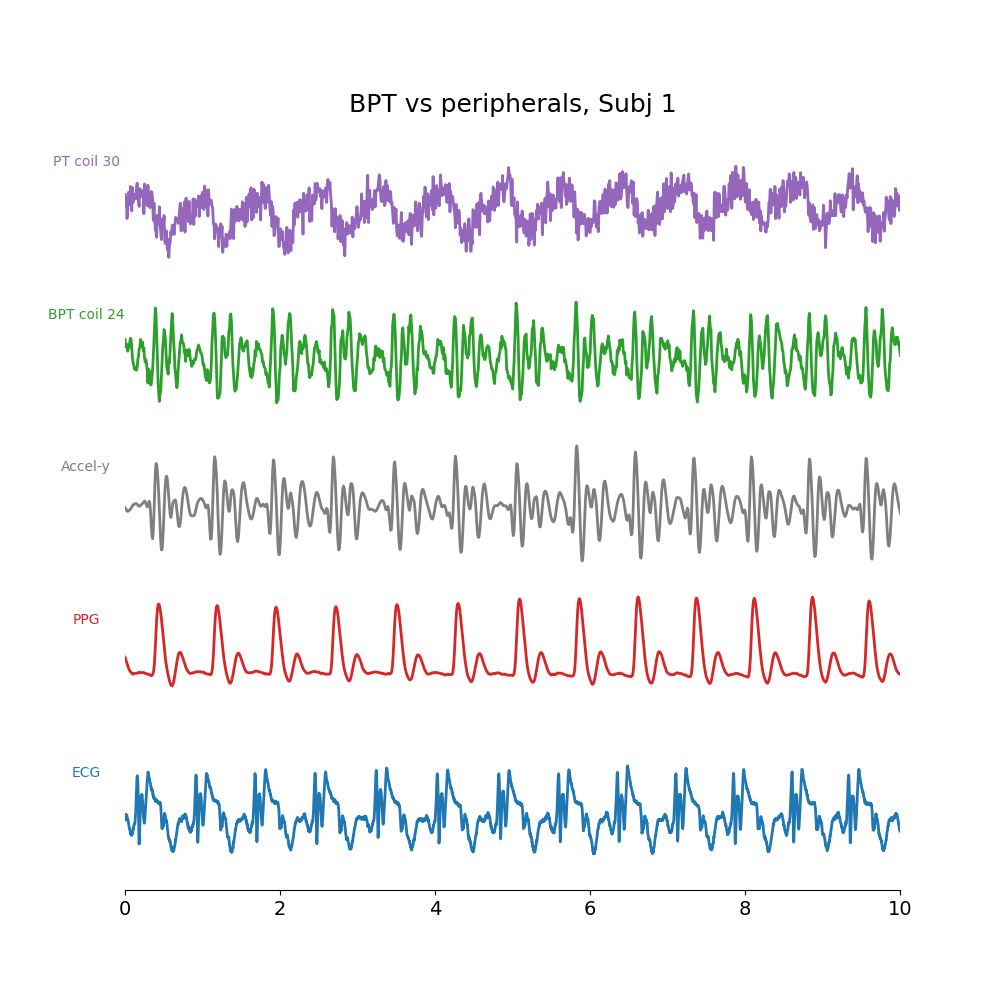

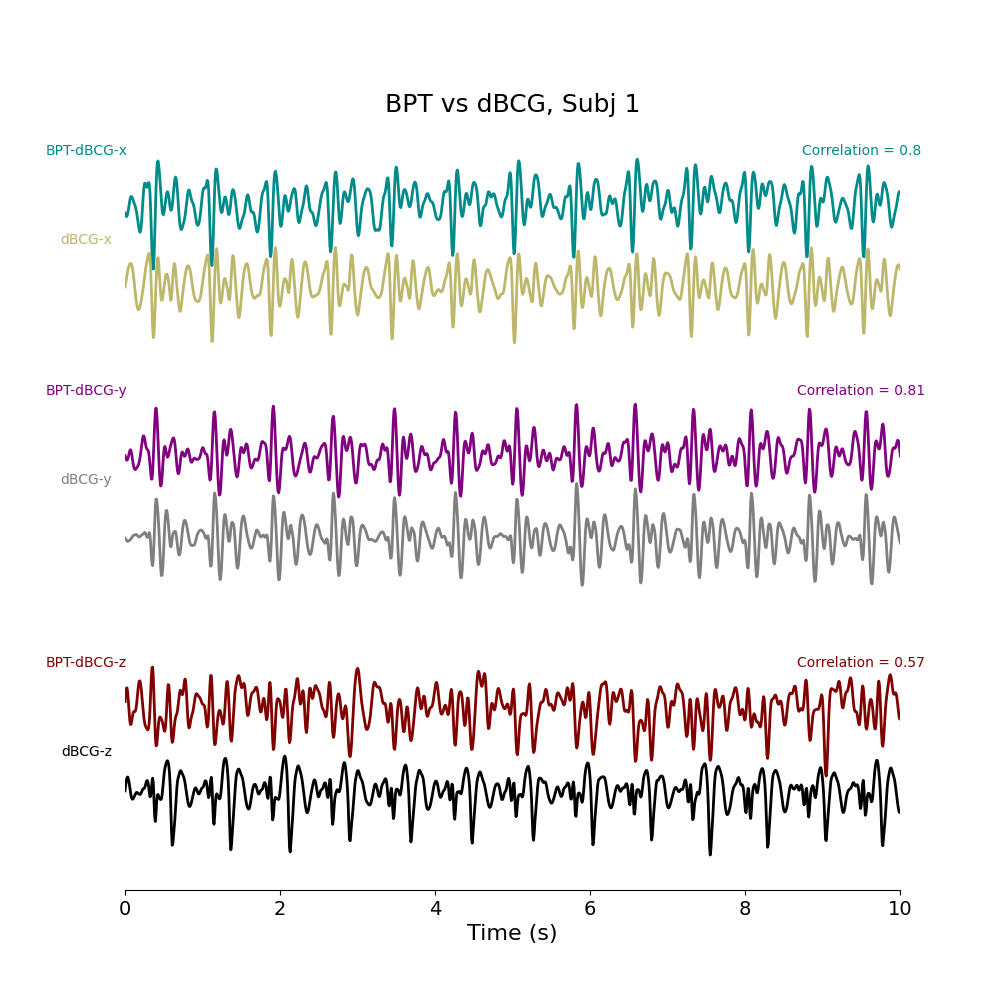

In [29]:
# Plot data for a single subject
%matplotlib widget
# Plot loop
inpdirs = ["data/subj1"]
# Uncomment the line below to run the plots for both subjects
# inpdirs = ["data/subj1", "data/subj2"]

ecg_indices = [0,1]
ecg_scales = [1,-1]
cutoff = 4

for i, inpdir in enumerate(inpdirs):
    # Choose appropriate coils
    if i == 0:
        c_mat = np.array([[14,10,8],[8,5,1]]) + 16
        c = [30,24]

    else:
        c_mat = np.array([[14,13,12],[12,5,8]])
        c = [13,12]
        
    # Load data
    bpt, ecg, ppg, accel_d = proc.load_data(inpdir, ecg_indices[i], cutoff)
    
    # Plot bpt vs pt
    plot.plot_bpt_pt(bpt, c_mat, title="Raw BPT vs PT Magnitude, Subj {}".format(i+1))

    # Plot BPT vs accel
    plot.plot_bpt_accel(bpt, accel_d, ecg, ppg, figsize=(10,10), shift=-8, c=c, ecg_scale=ecg_scales[i], title="BPT vs peripherals, Subj {}".format(i+1))

    # Plot regressed BPT vs accel
    plot.plot_dbcg(bpt, accel_d, tr=8.7e-3, t_end=10, title="BPT vs dBCG, Subj {}".format(i+1))

## Extract the BPT

The dataset for this abstract consists of data from two subjects. First, let's extract the BPT from subject 1. We acquired a series of 2D images with gradients and RF excitation off (which is why there is no actual MR image). The kspace is of size `[nro, npe, nframes, ncoils]`, corresponding to the number of readout points, phase encodes, frames, and receiver coils.

In [ ]:
# Define directories
main_dir = "data"
subj1_dir = "subj1"

# Load the kspace data
inpdir = os.path.join(main_dir, subj1_dir)
ksp = cfl.readcfl(os.path.join(inpdir, "ksp")) # [N,N,nframes,ncoils]

If we take a Fourier transform along the readout direction and plot a single line of the magnitude kspace, we can see two peaks. These correspond to the PT (127.6MHz) and the BPT (2.4GHz/2.5278GHz). The PT was transmitted simultaneously using a separate antenna.

In [ ]:
# Update plot params to show the y-axis as a solid line
plt.rcParams.update({'axes.spines.left':True,
                    })

Text(0.5, 1.0, 'F(ksp) for the first 10 kspace lines')

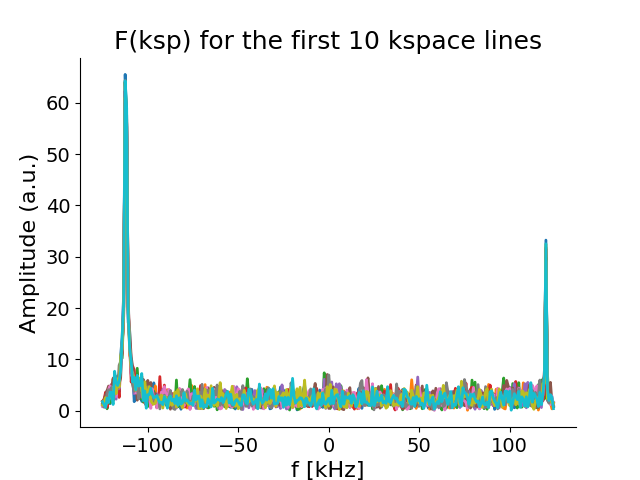

In [ ]:
ksp_f = sp.ifft(ksp, axes=(0,)) # Take IFFT along readout direction
nro, npe, nframes, ncoils = ksp_f.shape
fs = 250 # Readout bandwidth, kHz
f = np.arange(-nro/2,nro/2)*fs/nro

# Plot for the first 10 phase encodes
npe_plot = 10
plt.figure()
plt.plot(f, np.abs(ksp_f[:,:npe_plot,0,0]));
plt.xlabel("f [kHz]")
plt.ylabel("Amplitude (a.u.)")
plt.title("F(ksp) for the first {} kspace lines".format(npe_plot))

To extract the two BPTs, let's find the peaks in `ksp_f` and extract the values at the peaks.



In [ ]:
def get_bpt(ksp, threshold=0.1):
  # Take IFFT along readout direction
  ksp_f = sp.ifft(ksp, axes=(0,)) 
  nro, npe, nframes, ncoils = ksp_f.shape

  # Find peaks by taking root sum square over dimensions other than readout
  # Peaks are extracted if they are greater than the threshold
  ksp_f_rss = sp.rss(ksp_f, axes=(1,2,3))
  ksp_f_rss /= np.amax(ksp_f_rss)
  peaks, _ = find_peaks(ksp_f_rss, threshold=threshold)

  # Extract BPT at those locations
  bpt = ksp_f[peaks,...] # First dim is the number of BPTs

  # Reshape the BPT to be of size [nbpts, npe*nframes, ncoils]
  bpt_r = np.reshape(bpt, (peaks.shape[0], npe*nframes, ncoils), order="F")

  return bpt_r

Now we can extract and plot the raw PT and BPT, respectively. You can immediately see that the raw signals are quite different in signal shape!

You also may notice that the PT is much stronger (i.e., has a higher signal level) compared to the BPT - in my experiments, I had to increase the PT strength to be able to see any cardiac signal.

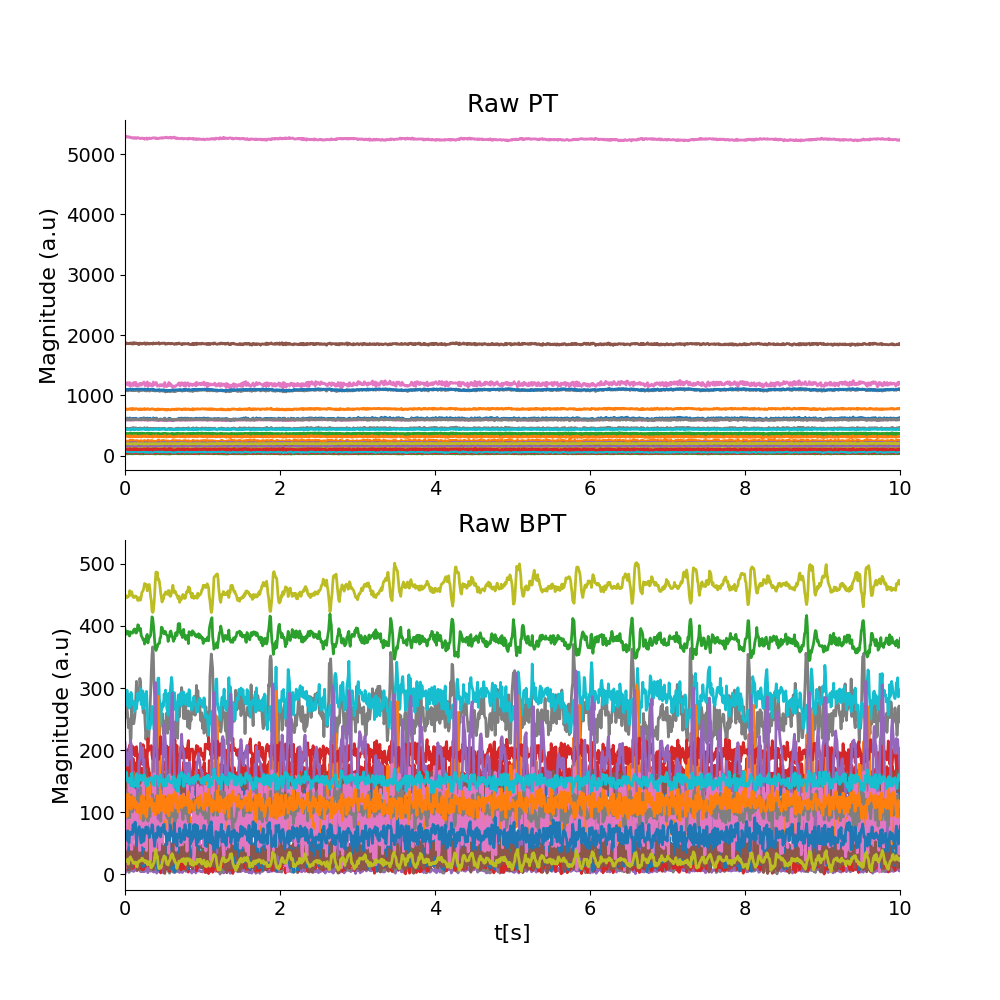

In [ ]:
# Extract PT and BPT
bpt = get_bpt(ksp)

# Define a time axis
tr = 8.7e-3
t = np.arange(bpt.shape[1])*tr

# Plot
titles = ["Raw PT", "Raw BPT"]
plt.figure(figsize=(10,10))
for i in range(bpt.shape[0]):
  plt.subplot(2,1,i+1)
  plt.title(titles[i])
  plt.plot(t, np.abs(bpt[i,...]))
  if i == bpt.shape[0]-1: # t label only for the second subplot
    plt.xlabel("t[s]")
  plt.ylabel("Magnitude (a.u)")
  plt.xlim([0,10]) # First 10 seconds of data

## Extract accelerometer data

We acquired data simultaneously with an accelerometer that was placed on the subject's chest (see Overview). Let's now extract the data from the accelerometer. It's stored as a text file that is written by an Arduino. We can do it using the function below.

In [ ]:
def get_accel_data(inpdir, fname=None):
    ''' Load accelerometer data from file '''
    # Load fname as file that starts with 'data'
    if fname is None:
        fname = [f for f in os.listdir(inpdir) if f.startswith('data')][0]
    data = np.loadtxt(os.path.join(inpdir,fname))
    x = data[:,1]
    y = data[:,2]
    z = data[:,3]
    accel = np.vstack([x,y,z]).T
    return accel[1:,:] # Return in the same shape as BPT

In [ ]:
accel = get_accel_data(inpdir)
print("Accel data shape = {}".format(accel.shape))

Accel data shape = (4200, 3)


We can compute displacement by high pass filtering the data, then integrating it. We have to high pass filter so that we remove any drift from the data, which is amplified by the integration operation. We'll use the helper function `dbl_int`, which does the double integration.

In [ ]:
def dbl_int(accel, tr=8.7e-3, cutoff=1, get_v=False):
    ''' Double integrate acceleration -> displacement '''
    # Apply high pass filter to accelerometer signal
    accel_filt = proc.filter_sig(accel, cutoff=cutoff, fs=1/tr, order=6, btype='high')
    # Compute velocity
    accel_v = integ.cumtrapz(accel_filt, dx=tr, initial=0)
    # Remove the mean before integrating again
    accel_d = integ.cumtrapz(proc.normalize(accel_v, var=False), dx=tr, initial=0)
    
    if get_v is True: # Return velocity and displacement
        return accel_d, accel_v
    else:
        return accel_d # Return just displacement

def get_accel_d(accel, tr=8.7e-3, cutoff=3, get_v=False):
    ''' Get integrated acceleration -> displacement for all axes '''
    accel_d = np.empty((accel.shape[0],3))
    if get_v is True:
        # Optionally get velocity
        accel_v = np.empty((accel.shape[0],3))
        for i in range(accel_d.shape[-1]):
            d, v = dbl_int(accel[:,i], tr=tr, cutoff=cutoff, get_v=True)
            accel_d[:,i] = d
            accel_v[:,i] = v
        return accel_d, accel_v
    else:
        # Get displacement
        for i in range(accel_d.shape[-1]):
            accel_d[:,i] = dbl_int(accel[:,i], tr=tr, cutoff=cutoff, get_v=False)
        return accel_d

The acceleration is in units of g. We'll display displacement in arbitrary units, with a vertical shift between each of the three axes so that you can see the signal clearly.

<ipython-input-17-c38308c449c6>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Text(0.5, 1.0, 'Displacement measured by accelerometer')

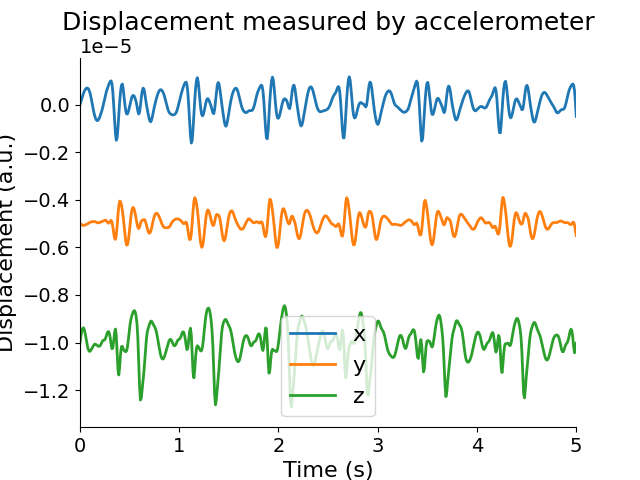

In [ ]:
cutoff = 4 # Hz
accel_d = get_accel_d(accel, tr=tr, cutoff=cutoff)
t = np.arange(accel_d.shape[0])*tr

# Plot the accelerometer data with a vertical shift between each axis
shift = -5e-6
plt.figure()
plt.plot(t, accel_d + np.arange(3)*shift)
plt.xlim([0,5])
plt.legend(["x","y","z"])
plt.xlabel("Time (s)")
plt.ylabel("Displacement (a.u.)")
plt.title("Displacement measured by accelerometer")

## Linear regression to compare BPT and dBCG

The BPT data contains signals from multiple coils. To compare the BPT quantitatively to dBCG, we regressed the multi-coil BPT signal to each of the computed displacements (x, y, and z), i.e. we found a linear combination of BPT signals that most closely matched the accelerometer dBCG. We did this by a least-squares using `lsq_linear` from scipy.optimize. The function `get_bpt_d` computes the fit, with `lin_comb` as a helper function.

In [ ]:
def get_bpt_d(accel_d, bpt_inp):
    ''' Find coefficients to linearly combine BPT to match displacement'''
    bpt_d = np.empty(accel_d.shape)
    for i in range(accel_d.shape[1]):
        accel_inp = proc.normalize(accel_d[:,i])
        opt_vals = lsq_linear(bpt_inp, accel_inp)
        bpt_d[:,i] = lin_comb(opt_vals.x, bpt_inp)
    return bpt_d

def lin_comb(x, accel_d):
    ''' Take linear combination of elements in accel_d with coefficents in x'''
    return np.sum(x[i] * accel_d[:,i] for i in range(accel_d.shape[1]))


Here, we'll compute the regression and plot it for each axis. The linearly combined BPTs are denoted by "BPT-dBCG-[axis]" for axes x,y, and z. The accelerometer displacement is just called "dBCG-[axis]". The axes x, y, and z correspond to superior/inferior, left/right, and anterior/posterior.

([], [])

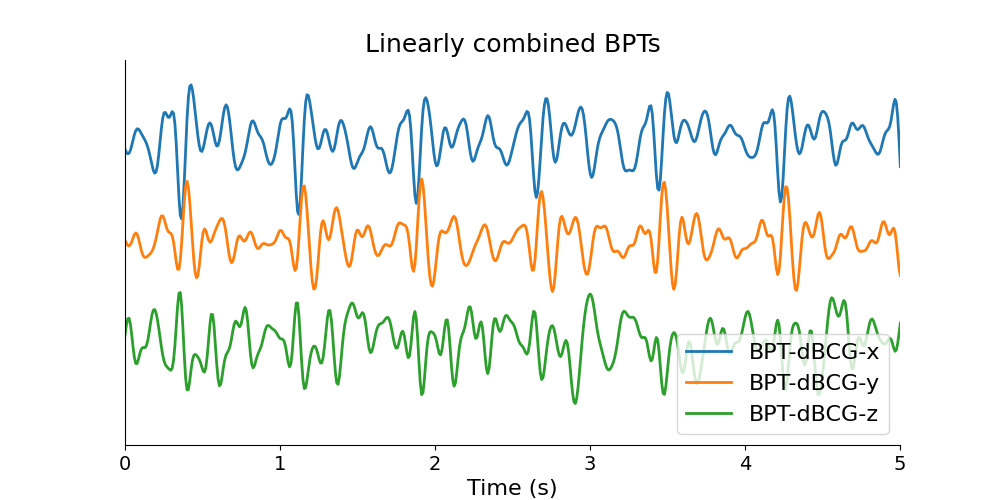

In [ ]:
# Remove mean from input
bpt_inp = proc.normalize_c(np.abs(bpt[1,...]))
accel_inp = proc.normalize_c(accel_d)

# Compute linear fit
bpt_d = proc.get_bpt_d(accel_inp, bpt_inp)

# Filter
bpt_filt = proc.filter_c(bpt_d, cutoff=15, tr=tr)

# Plot regressed BPT with vertical shift
shift = -5
plt.figure(figsize=(10,5))
plt.plot(t, proc.normalize_c(bpt_filt) + np.arange(3)*shift);
plt.legend(["BPT-dBCG-{}".format(axis) for axis in ["x","y","z"]],
           loc="lower right")
plt.xlim([0,5])
plt.title("Linearly combined BPTs")
plt.xlabel("Time (s)")
plt.yticks([])

To evaluate how well they match, we can compare the dBCG to BPT-dBCG on each axis and compute the Pearson correlation between the two. That's exactly what the plotting function `plot_dbcg` does:

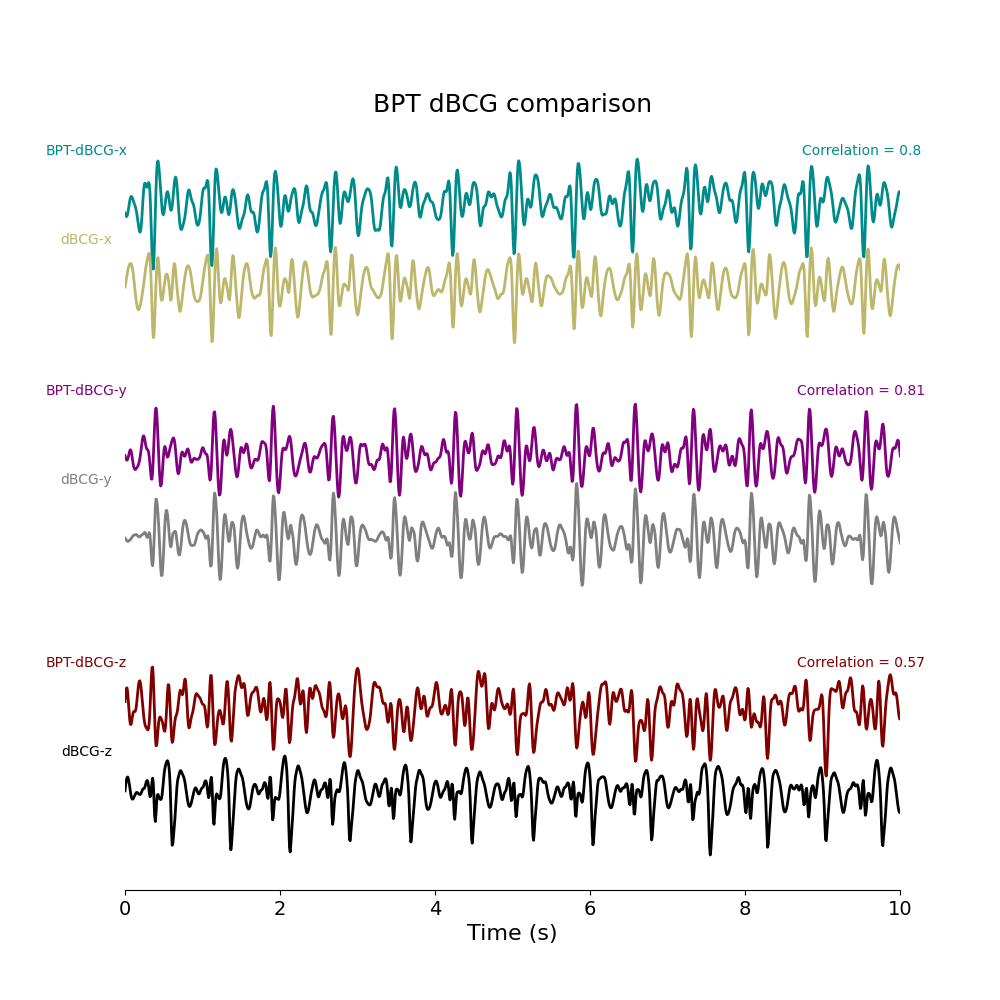

In [ ]:
# Update plot params to show the y-axis as a solid line
plt.rcParams.update({'axes.spines.left':False,
                    })
# Plot dBCG and BPT-dBCG
plot.plot_dbcg(bpt, accel_d, tr=tr, t_end=10, title="BPT dBCG comparison")

## Load physio data

The ECG and PPG data is also saved to a text file. The data has about 30 extra seconds (see [this reference](https://cni.stanford.edu/wiki/MR_Hardware#Physio_monitoring)), so we need to chop that off. We'll use the function `get_physio_waveforms`, with helper functions `load_physio` and `crop_physio`. We used vector ECG with two channels, and we plot just the first one.

In [ ]:
def load_physio(inpdir, ftype="PPG"):
    ''' Load physio waveform from text file '''
    # Check for text file in the input directory that starts with appropriate name
    physio_fnames = [f for f in os.listdir(inpdir) if f.startswith(ftype)]
    physio = []
    for i in range(len(physio_fnames)):
        physio.append(np.loadtxt(os.path.join(inpdir,physio_fnames[i]),
                    comments="#", delimiter=",", unpack=False))
    return np.array(physio)

def crop_physio(phys, bpt_len, tr_phys=1e-3, from_front=True):
    ''' Crop first ~30s of physio waveform '''
    phys_len = phys.shape[0]*tr_phys
    phys_diff = phys_len - bpt_len # seconds
    phys_crop = phys[int(phys_diff//tr_phys):]
    return phys_crop

def get_physio_waveforms(inpdir, bpt_len=None,
                         tr_ppg=10e-3, tr_ecg=1e-3,
                         load_ppg=True, load_ecg=True, index=0):
    ''' Load ECG and PPG data based on input directory. First ECG by default '''
    phys_waveforms = [] # Order is [ecg, ppg]
    if load_ecg is True:
        ecg = load_physio(inpdir, ftype="ECG")[index,:] # First ECG
        ecg_crop = crop_physio(ecg, bpt_len, tr_phys=tr_ecg)
        phys_waveforms.append(ecg_crop)
    if load_ppg is True:
        ppg = np.squeeze(load_physio(inpdir, ftype="PPG"))
        ppg_crop = crop_physio(ppg, bpt_len, tr_phys=tr_ppg)
        phys_waveforms.append(ppg_crop)
    return phys_waveforms

For visualization, we'll normalize the PPG and ECG signals, i.e. subtract the mean and divide by the variance. Then, we show each of them with a vertical shift so that they don't overlap on the plot.

Text(0.5, 1.0, 'MRI Peripheral Data')

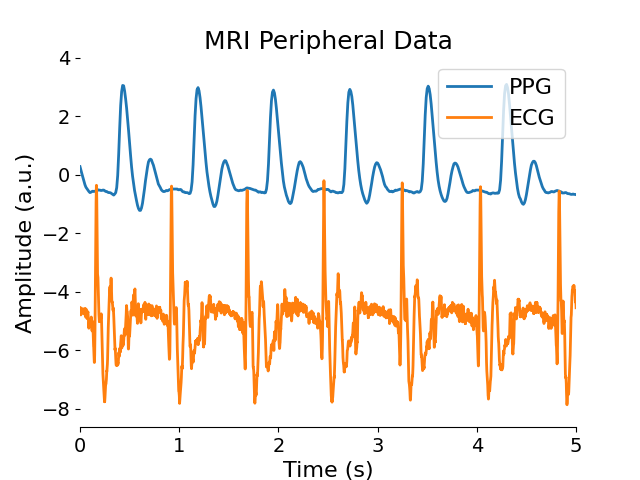

In [ ]:
# Load peripherals
[ecg, ppg] = get_physio_waveforms(inpdir,
                                  bpt_len=bpt.shape[1]*tr,
                                  index=1)

# Plot  
# Get t axis  
t_ecg = proc.get_t_axis(ecg.shape[0], delta_t=1e-3)
t_ppg = proc.get_t_axis(ppg.shape[0], delta_t=10e-3)
# Plot normalized ECG and PPG with vertical shift
shift = -5
plt.figure()
plt.plot(t_ppg, proc.normalize(ppg))
plt.plot(t_ecg, -1*proc.normalize(ecg) + shift)
plt.xlim([0,5])
plt.legend(["PPG", "ECG"])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.title("MRI Peripheral Data")

## Putting it all together

Now that we have all the pieces in place, we can load the data and generate plots. The cell below shows the plots for a single subject. We load the data with the `load_data` function, then plot three figures.

The first figure compares BPT to PT with hand-selected coils. You can change these indices to plot other coils.

The second figure plots BPT vs peripherals and the accelerometer displacement.

The third figure compares the linearly combined BPT (BPT-dBCG) to dBCG on each accelerometer axis.

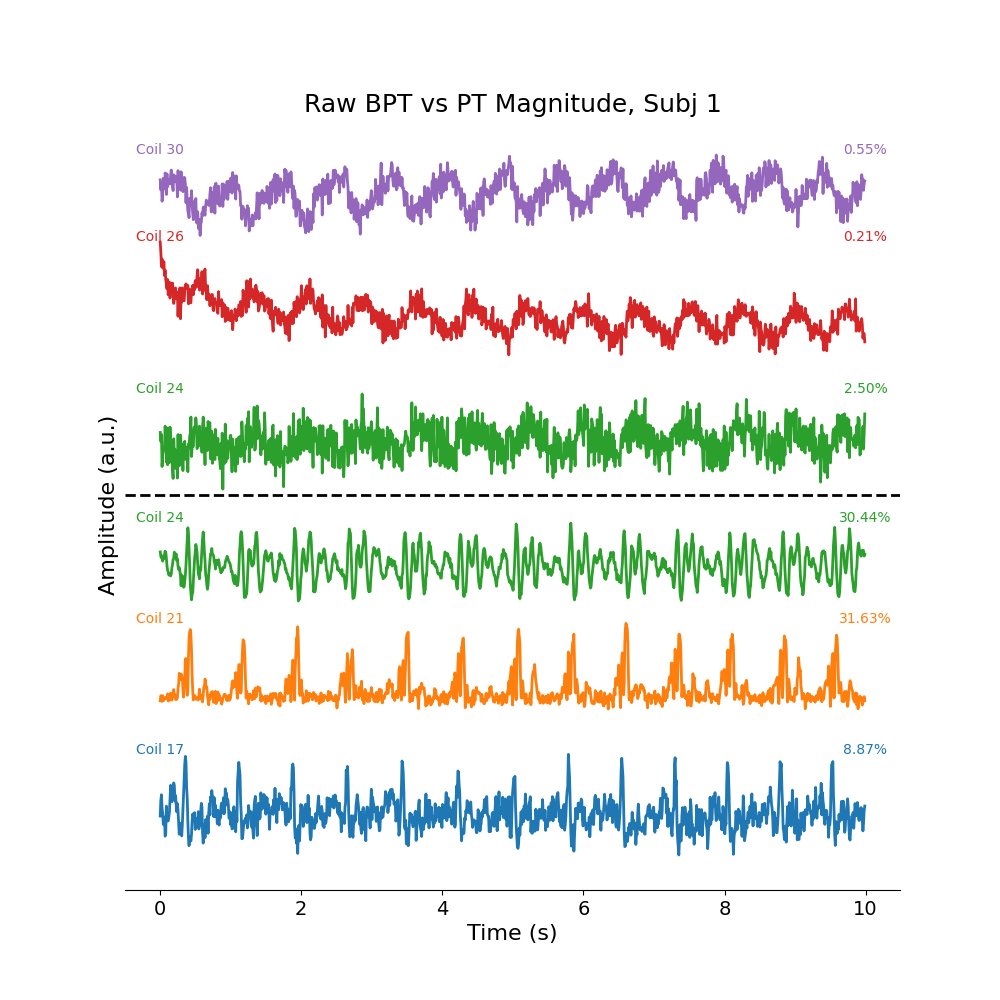

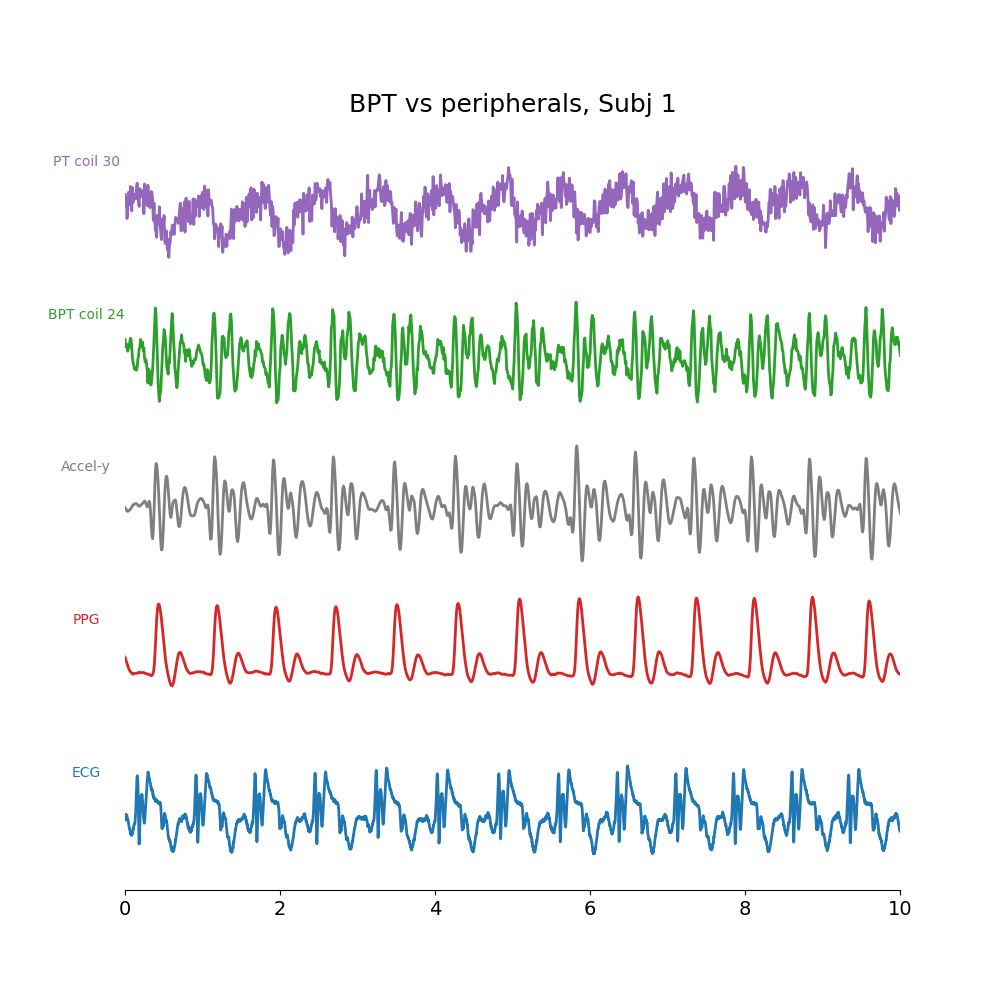

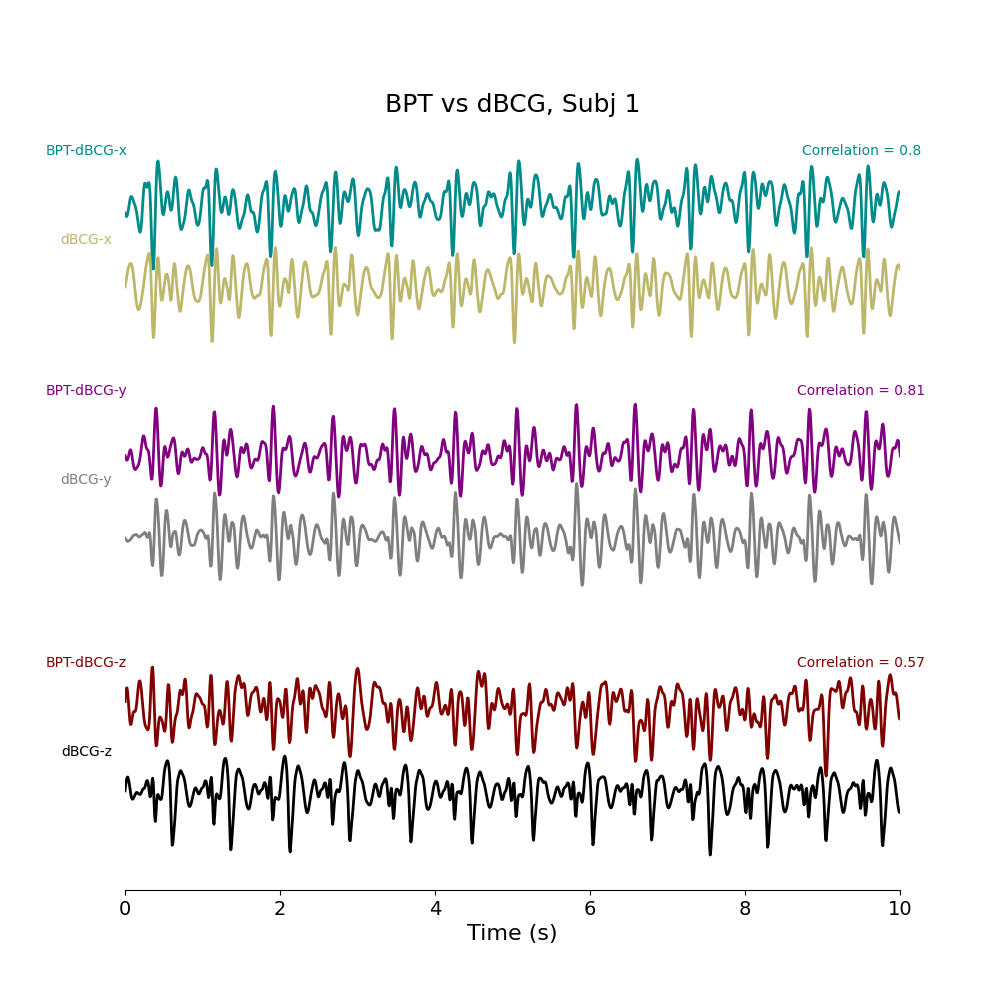

In [ ]:
%matplotlib widget
# Plot loop
inpdirs = ["data/subj1"]

ecg_indices = [0,1]
ecg_scales = [1,-1]
cutoff = 4

for i, inpdir in enumerate(inpdirs):
    # Choose appropriate coils
    if i == 0:
        c_mat = np.array([[14,10,8],[8,5,1]]) + 16
        c = [30,24]

    else:
        c_mat = np.array([[14,13,12],[12,5,8]])
        c = [13,12]
        
    # Load data
    bpt, ecg, ppg, accel_d = proc.load_data(inpdir, ecg_indices[i], cutoff)
    
    # Plot bpt vs pt
    plot.plot_bpt_pt(bpt, c_mat, title="Raw BPT vs PT Magnitude, Subj {}".format(i+1))

    # Plot BPT vs accel
    plot.plot_bpt_accel(bpt, accel_d, ecg, ppg, figsize=(10,10), shift=-8, c=c, ecg_scale=ecg_scales[i], title="BPT vs peripherals, Subj {}".format(i+1))

    # Plot regressed BPT vs accel
    plot.plot_dbcg(bpt, accel_d, tr=8.7e-3, t_end=10, title="BPT vs dBCG, Subj {}".format(i+1))

# Conclusion

I hope you enjoyed this demo! Please feel free to reach out with questions or comments to me at sanand@berkeley.edu.